In [1]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")

In [25]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323747 entries, 0 to 3323746
Data columns (total 44 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   HourUTC          3323747 non-null  object 
 1   HourDK           3323747 non-null  object 
 2   DK3619Code       3323747 non-null  object 
 3   hour             3323747 non-null  int64  
 4   day_of_week      3323747 non-null  int64  
 5   weekday_name     3323747 non-null  object 
 6   quarter          3323747 non-null  int64  
 7   month            3323747 non-null  int64  
 8   year             3323747 non-null  int64  
 9   day_of_year      3323747 non-null  int64  
 10  day_of_month     3323747 non-null  int64  
 11  week_of_year     3323747 non-null  int64  
 12  season           3323747 non-null  object 
 13  holiday          3323747 non-null  int64  
 14  DK36Code         3323747 non-null  object 
 15  DK36Title        3323747 non-null  object 
 16  DK19Code         3

In [26]:
import pandas as pd

# Giả sử dữ liệu của bạn được đọc vào một DataFrame có tên là df
# df = pd.read_csv('file_path.csv')  # Đọc dữ liệu từ file CSV nếu cần

# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()

# Kiểm tra lại kết quả
print(df_cleaned.info(show_counts = True))


<class 'pandas.core.frame.DataFrame'>
Index: 3322211 entries, 1467 to 3323746
Data columns (total 44 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   HourUTC          3322211 non-null  object 
 1   HourDK           3322211 non-null  object 
 2   DK3619Code       3322211 non-null  object 
 3   hour             3322211 non-null  int64  
 4   day_of_week      3322211 non-null  int64  
 5   weekday_name     3322211 non-null  object 
 6   quarter          3322211 non-null  int64  
 7   month            3322211 non-null  int64  
 8   year             3322211 non-null  int64  
 9   day_of_year      3322211 non-null  int64  
 10  day_of_month     3322211 non-null  int64  
 11  week_of_year     3322211 non-null  int64  
 12  season           3322211 non-null  object 
 13  holiday          3322211 non-null  int64  
 14  DK36Code         3322211 non-null  object 
 15  DK36Title        3322211 non-null  object 
 16  DK19Code         332

In [27]:
df

,HourUTC,HourDK,DK3619Code,hour,day_of_week,weekday_name,quarter,month,year,day_of_year,...,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48
0,2012-06-01T23:00:00,2012-06-02 01:00:00,M_MA,1,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-06-01T23:00:00,2012-06-02 01:00:00,C_CE_CF_CD,1,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-06-02T00:00:00,2012-06-02 02:00:00,G_G,2,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-06-02T00:00:00,2012-06-02 02:00:00,Q_QA,2,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-06-02T00:00:00,2012-06-02 02:00:00,P_P,2,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323742,2024-06-21T21:00:00,2024-06-21 23:00:00,E_E,23,4,Friday,2,6,2024,173,...,87.618240,82.821385,70.622805,61.690048,62.361953,65.590067,64.432311,68.518896,72.014153,75.413964
3323743,2024-06-21T21:00:00,2024-06-21 23:00:00,F_F,23,4,Friday,2,6,2024,173,...,37.126816,36.460320,29.888800,23.870010,22.132825,25.656644,25.505458,25.846402,26.237788,27.272171
3323744,2024-06-21T21:00:00,2024-06-21 23:00:00,I_I,23,4,Friday,2,6,2024,173,...,85.969801,76.281388,66.476163,57.967190,52.255899,51.656221,52.373241,54.961426,60.072132,67.941572
3323745,2024-06-21T21:00:00,2024-06-21 23:00:00,H_H,23,4,Friday,2,6,2024,173,...,151.689095,145.202948,134.877695,120.354189,105.771501,108.005934,111.028472,125.453933,132.191272,130.828517


In [28]:
df_cleaned

,HourUTC,HourDK,DK3619Code,hour,day_of_week,weekday_name,quarter,month,year,day_of_year,...,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48
1467,2012-06-03T23:00:00,2012-06-04 01:00:00,M_MA,1,0,Monday,2,6,2012,156,...,13.824711,13.694861,12.922770,12.553444,12.089538,12.042611,12.151106,12.189308,11.898054,0.068992
1489,2012-06-03T23:00:00,2012-06-04 01:00:00,C_CE_CF_CD,1,0,Monday,2,6,2012,156,...,97.184364,97.093674,96.370445,95.223534,94.855904,94.575890,94.900558,94.214874,94.382088,8.836999
1490,2012-06-04T00:00:00,2012-06-04 02:00:00,O_O,2,0,Monday,2,6,2012,156,...,62.669842,62.773857,60.122555,56.666725,53.761436,49.608936,45.899372,46.200718,46.865311,47.197079
1491,2012-06-04T00:00:00,2012-06-04 02:00:00,H_H,2,0,Monday,2,6,2012,156,...,26.120724,31.994280,26.535959,25.718319,25.528309,24.415733,26.221659,26.492964,26.954473,26.933138
1492,2012-06-04T00:00:00,2012-06-04 02:00:00,R_R,2,0,Monday,2,6,2012,156,...,15.675517,14.210869,11.825861,9.973243,8.043448,6.853898,6.383632,6.311064,6.546678,6.785315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323742,2024-06-21T21:00:00,2024-06-21 23:00:00,E_E,23,4,Friday,2,6,2024,173,...,87.618240,82.821385,70.622805,61.690048,62.361953,65.590067,64.432311,68.518896,72.014153,75.413964
3323743,2024-06-21T21:00:00,2024-06-21 23:00:00,F_F,23,4,Friday,2,6,2024,173,...,37.126816,36.460320,29.888800,23.870010,22.132825,25.656644,25.505458,25.846402,26.237788,27.272171
3323744,2024-06-21T21:00:00,2024-06-21 23:00:00,I_I,23,4,Friday,2,6,2024,173,...,85.969801,76.281388,66.476163,57.967190,52.255899,51.656221,52.373241,54.961426,60.072132,67.941572
3323745,2024-06-21T21:00:00,2024-06-21 23:00:00,H_H,23,4,Friday,2,6,2024,173,...,151.689095,145.202948,134.877695,120.354189,105.771501,108.005934,111.028472,125.453933,132.191272,130.828517


### Choose Feauture will use for Model

In [29]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'weekday_name', 'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'M_MA']

df_corr = df_filter[columns]
#df_corr = pd.get_dummies(df_corr, columns=['DK3619Code'], prefix=['DK3619Code'])


In [30]:
df_corr.columns

Index(['HourUTC', 'HourDK', 'hour', 'day_of_week', 'weekday_name', 'quarter',
       'month', 'year', 'day_of_year', 'day_of_month', 'week_of_year',
       'season', 'holiday', 'lag_24', 'lag_25', 'lag_26', 'lag_27', 'lag_28',
       'lag_29', 'lag_30', 'lag_31', 'lag_32', 'lag_33', 'lag_34', 'lag_35',
       'lag_36', 'lag_37', 'lag_38', 'lag_39', 'lag_40', 'lag_41', 'lag_42',
       'lag_43', 'lag_44', 'lag_45', 'lag_46', 'lag_47', 'lag_48',
       'Consumption_MWh'],
      dtype='object')

In [31]:
### Mapping data to numberic 

weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


/tmp/ipykernel_34/3445385018.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


In [32]:
### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df_corr['season'] = df_corr['season'].map(seasons_mapping)

/tmp/ipykernel_34/3343511339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['season'] = df_corr['season'].map(seasons_mapping)


In [33]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

/tmp/ipykernel_34/1245307159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_34/1245307159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


In [34]:
df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2019-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2019-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)

In [37]:
# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])

In [38]:
df_train.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 58392 entries, 1467 to 1812329
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hour             58392 non-null  int64  
 1   day_of_week      58392 non-null  int64  
 2   weekday_name     58392 non-null  int64  
 3   quarter          58392 non-null  int64  
 4   month            58392 non-null  int64  
 5   year             58392 non-null  int64  
 6   day_of_year      58392 non-null  int64  
 7   day_of_month     58392 non-null  int64  
 8   week_of_year     58392 non-null  int64  
 9   season           58392 non-null  int64  
 10  holiday          58392 non-null  int64  
 11  lag_24           58392 non-null  float64
 12  lag_25           58392 non-null  float64
 13  lag_26           58392 non-null  float64
 14  lag_27           58392 non-null  float64
 15  lag_28           58392 non-null  float64
 16  lag_29           58392 non-null  float64
 17  lag_30      

In [39]:
df_test.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 46559 entries, 1833867 to 3323719
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hour             46559 non-null  int64  
 1   day_of_week      46559 non-null  int64  
 2   weekday_name     46559 non-null  int64  
 3   quarter          46559 non-null  int64  
 4   month            46559 non-null  int64  
 5   year             46559 non-null  int64  
 6   day_of_year      46559 non-null  int64  
 7   day_of_month     46559 non-null  int64  
 8   week_of_year     46559 non-null  int64  
 9   season           46559 non-null  int64  
 10  holiday          46559 non-null  int64  
 11  lag_24           46559 non-null  float64
 12  lag_25           46559 non-null  float64
 13  lag_26           46559 non-null  float64
 14  lag_27           46559 non-null  float64
 15  lag_28           46559 non-null  float64
 16  lag_29           46559 non-null  float64
 17  lag_30   

In [16]:
# df_corr = df_corr.drop(['HourUTC', 'HourDK'], axis=1)
# correlation_matrix = df_corr.corr()

# print(correlation_matrix)

/tmp/ipykernel_34/4229419573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_34/4229419573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


                     hour  day_of_week  weekday_name   quarter     month  \
hour             1.000000    -0.000024     -0.000024 -0.000427 -0.000319   
day_of_week     -0.000024     1.000000      1.000000  0.000812  0.001685   
weekday_name    -0.000024     1.000000      1.000000  0.000812  0.001685   
quarter         -0.000427     0.000812      0.000812  1.000000  0.971218   
month           -0.000319     0.001685      0.001685  0.971218  1.000000   
year             0.000018     0.000406      0.000406 -0.121397 -0.121960   
day_of_year     -0.000321     0.001657      0.001657  0.968092  0.996495   
day_of_month    -0.000014    -0.000149     -0.000149  0.013337  0.011063   
week_of_year    -0.000320     0.000402      0.000402  0.947891  0.972479   
season          -0.000287     0.000345      0.000345  0.213816  0.206287   
holiday          0.000227     0.009880      0.009880 -0.050622 -0.052037   
lag_24           0.062032     0.000140      0.000140 -0.124631 -0.111841   
lag_25      

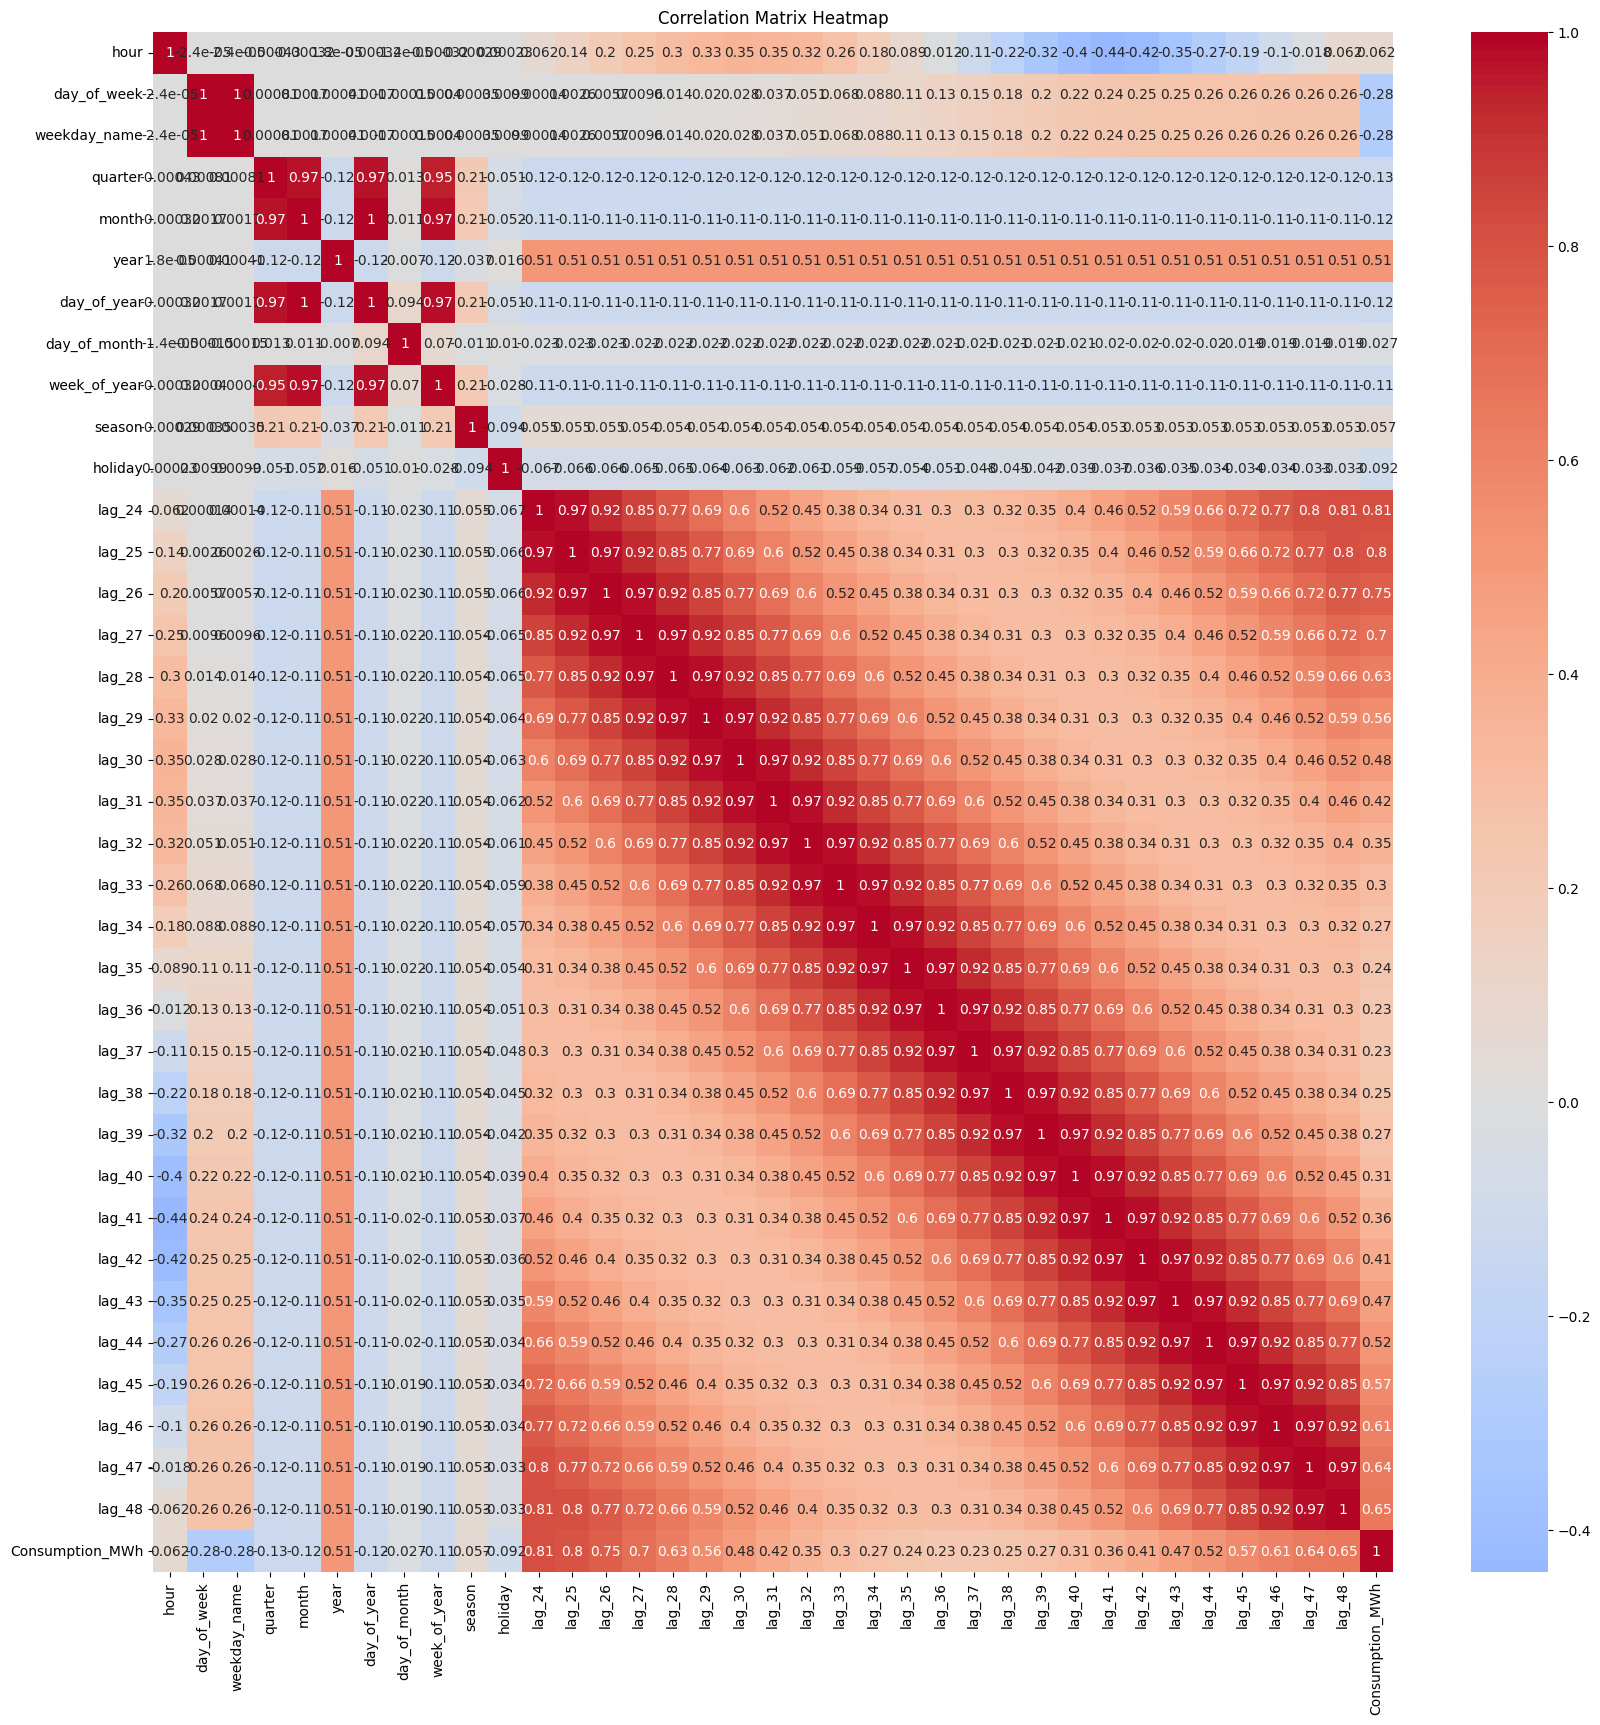

In [17]:
# # Plot the heatmap
# plt.figure(figsize=(20, 20))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix Heatmap')
# plt.show()

### Split data

In [18]:
# #Split data
# y = df_corr[['Consumption_MWh']]  # Target variable
# x = df_corr[['hour', 'day_of_week',
#                'weekday_name', 'quarter', 'month', 'year', 'day_of_year',
#                'day_of_month', 'week_of_year', 'season', 'holiday', 
#                'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
#                'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
#                'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
#                'lag_44','lag_45','lag_46','lag_47','lag_48']]  # Features



# # Split the data into training (60%), validation (20%), and test (20%) sets
# x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)

# # Further split the temporary data into validation (50%) and test (50%) sets
# x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### Train data

In [40]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_34/3321662033.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=10)

## Predict

In [41]:
y_pred = rf_model.predict(x_test)

In [42]:
y_pred

array([33.23658426, 32.6031318 , 32.47627514, ..., 35.58682   ,
       35.60119657, 35.19049213])

In [43]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 2.3865743661467835
Mean Squared Error (MSE): 16.96909592877527
Root Mean Squared Error (RMSE): 4.119356251743137
R-squared (R²): 0.8107378914985603


In [45]:
# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')

Number of features: 36
Number of importances: 36


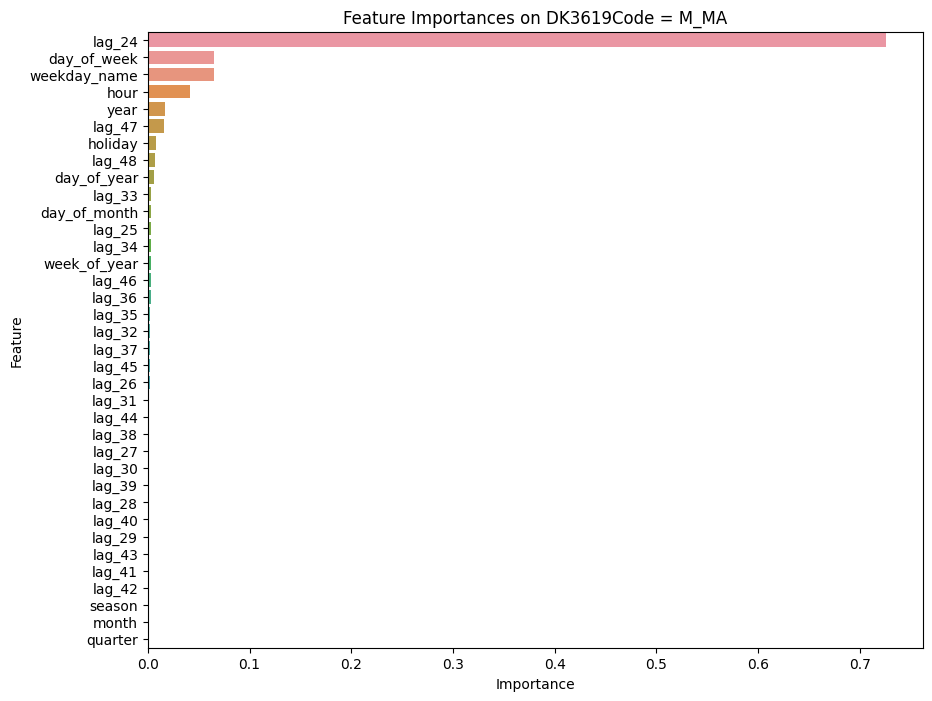

In [48]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = M_MA')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()